# Ford GoBike Dataset Exploration
## by Mario Gayed

## Preliminary Wrangling

Here we will be analyzing the data for Lyft (formerly named as Ford GoBike), which is an application you can use to
rent a bicycle in the Bay area in San Fransisco, you can pick up and drop off a bicycle. We will be analyzing the data collected from users of Lyft, during February 2019. These data can be found at https://www.lyft.com/bikes/bay-wheels/system-data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

-----------------------------

In [2]:
df = pd.read_csv('201902-fordgobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

Our dataset contains information about bike rentals over February 2019, almost  183412 entries, and 16 columns that describe the trip duration, start and end time.. also the gender, user type and birth date of the members (see in the cells above some more detailed info about our dataset structure).

### What is/are the main feature(s) of interest in your dataset?

We can make us of the trip start/end times, as well as user type, gender and birth date.

-----------------

## Data Cleaning

 - Take a copy of the original df

In [7]:
df2 = df.copy()

- Code:

In [8]:
# Drop null values
df2.dropna(inplace=True)

- Test:

In [9]:
# Test if there are null values remaining
df2.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

- Code:

In [10]:
# Create a new column for users age
df2['age'] = 2019 - df2['member_birth_year'].astype('int')

- Test:

In [11]:
df2['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

- Code:

In [12]:
#drop unreasonable ages (all ages +85)
df2 = df2[df2['age'] < 85 ]

- Test:

In [13]:
# Test ages max and min
df2['age'].describe()

count    174763.000000
mean         34.126028
std           9.879564
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          81.000000
Name: age, dtype: float64

- Code:

In [14]:
# Create new column for trip duration in minutes
df2['duration_min'] = df2['duration_sec'] / 60

In [15]:
# change the type of start/end times to datetime
df2['start_time']= pd.to_datetime(df2['start_time'])
df2['end_time']= pd.to_datetime(df2['end_time'])

In [16]:
# Create new columns for trip start/end hours and days
df2['start_month']=df2['start_time'].dt.strftime('%B')
df2['start_day_of_week']=df2['start_time'].dt.strftime('%a')
df2['start_hour_of_day']=df2['start_time'].dt.hour

df2['end_month']=df2['end_time'].dt.strftime('%B')
df2['end_day_of_week']=df2['end_time'].dt.strftime('%a')
df2['end_hour_of_day']=df2['end_time'].dt.hour

In [17]:
# Define a function to calculate the distance using lattitudes and longitudes of start/end coordinates
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
* math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

# Create a new column for the distance in KM
df2['distance'] = df2.apply(lambda i: distance([i['start_station_longitude'],i['start_station_latitude']],
                            [i['end_station_longitude'],i['end_station_latitude']]), axis=1)

- Test:

In [18]:
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,age,duration_min,start_month,start_day_of_week,start_hour_of_day,end_month,end_day_of_week,end_hour_of_day,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,35,869.750000,February,Thu,17,March,Fri,8,0.361191
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,No,47,1030.900000,February,Thu,12,March,Fri,5,2.641372
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,No,30,608.166667,February,Thu,17,March,Fri,4,0.266543
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Yes,45,26.416667,February,Thu,23,March,Fri,0,2.647945
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,No,60,29.883333,February,Thu,23,March,Fri,0,2.322918


In [19]:
df2.to_csv('df_clean.csv', index = False)

## Univariate Exploration

> In this section, we shall investigate distributions of individual variables.

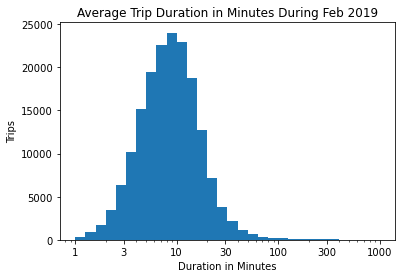

In [20]:
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(t) for t in ticks]
plt.hist(data = df2 , x = 'duration_min' , bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlabel('Duration in Minutes')
plt.title('Average Trip Duration in Minutes During Feb 2019')
plt.ylabel('Trips');


- In the plot above, we can notice the distribution of the trip durations, we can observe the bike rental system operates hugely on short rides (~10 mins).. with some outliers reach +300 minutes

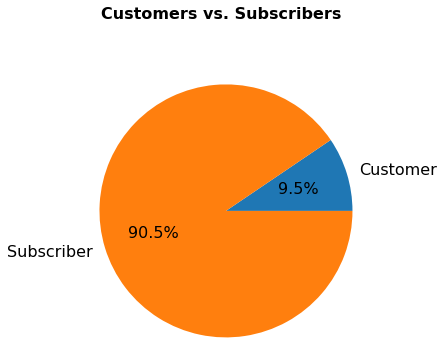

In [21]:
customer = df2.query('user_type == "Customer"')['bike_id'].count()
subscriber = df2.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df2['bike_id'].count()
subscriber_prop = subscriber / df2['bike_id'].count()

plt.figure(figsize = [5, 5])
labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
plt.pie(size, labels = labels, autopct='%1.1f%%', textprops={'color':'black','size':16})
plt.axis('equal')
plt.suptitle('Customers vs. Subscribers', y=1.07,fontsize=16, fontweight='bold');

- In the plot above, we can notice that the majority of Lyft users are subscribers.

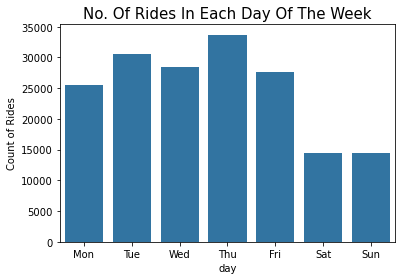

In [22]:
week_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
base_color = sb.color_palette()[0]
sb.countplot(data = df2, x = 'start_day_of_week', order = week_list, color = base_color)
plt.title('No. Of Rides In Each Day Of The Week', fontsize = 15)
plt.xlabel('day')
plt.ylabel('Count of Rides');

- In the plot above, we can notice the bike rides fall on weekends, it makes sense if most of the users are using it to get to work.

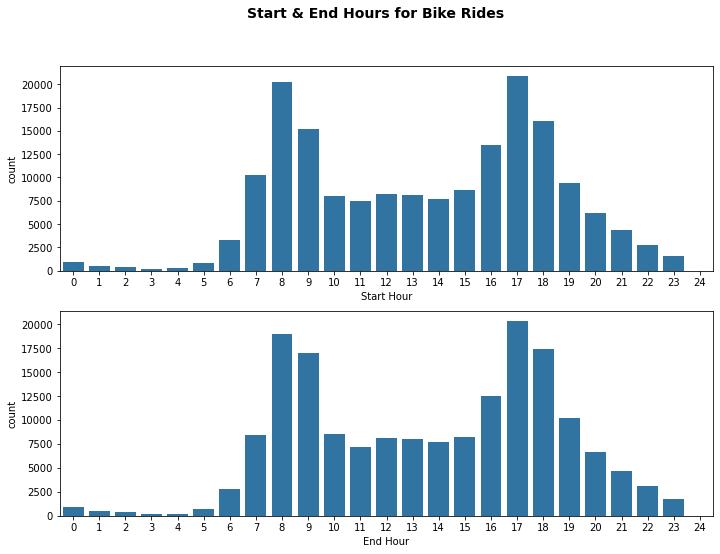

In [23]:
hour_list = ['0', '1', '2', '3', '4', '5', '6','7', '8', '9', '10', '11', '12', '13',
             '14', '15', '16', '17', '18', '19', '20','21', '22', '23', '24']

base_color = sb.color_palette()[0]
fig, ax =plt.subplots(2,1)
fig.suptitle('Start & End Hours for Bike Rides', fontsize=14, fontweight='semibold')
fig.set_size_inches(11.7, 8.27);

df2['Start Hour']=df2['start_hour_of_day'].astype(str)
sb.countplot(data = df2, x = 'Start Hour', order = hour_list, color = base_color,ax=ax[0])

df2['End Hour']=df2['end_hour_of_day'].astype(str)
sb.countplot(data = df2, x = 'End Hour', order = hour_list, color = base_color,ax=ax[1]);

- The busy hours in bike rentals like 8-9 am and 17-18 pm, shall prove our previous theory that users are mostly using Lyft app to get to/from work.

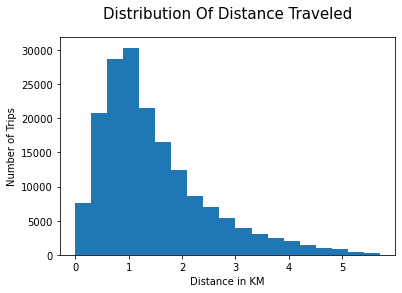

In [24]:
bins = np.arange(0, 6, 0.3)
plt.hist(data = df2, x = 'distance', bins = bins)
plt.title("Distribution Of Distance Traveled", y = 1.06, fontsize = 15)
plt.xlabel('Distance in KM')
plt.ylabel('Number of Trips');

- The short distances for most trips, may say that renting points are many, and also well distrubuted in this area, so users don't need to ride for long distances.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We needed some transformations that were already made in the cleaning section, like converting the trip duration to 'minutes' instead od 'seconds' for better interpreting, also we needed to calculate the trip distances (using the stations coordinates) to try to observe if the renting points are well distributed or not. Also we needed to make use of users birth dates, so we calculated their ages (2019 - birth year) to invistigate the relation between using Lyft and user's age.


## Bivariate Exploration

> In this section, we shall investigate relationships between pairs of variables in our
data.

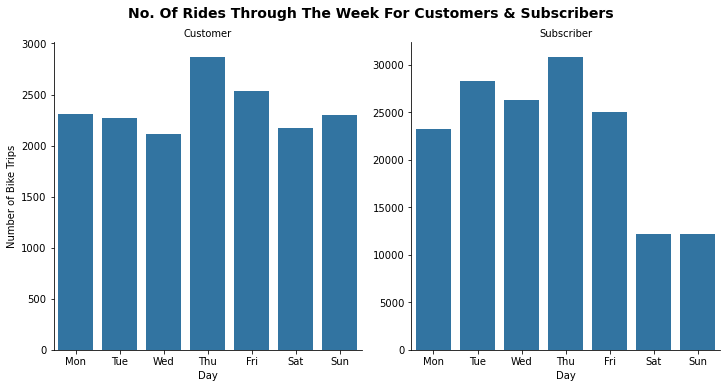

In [25]:
g = sb.catplot(data=df2, x='start_day_of_week', col="user_type", kind='count', sharey = False, order = week_list, color = base_color)
g.set_axis_labels("Day", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('No. Of Rides Through The Week For Customers & Subscribers', y=1.03, fontsize=14, fontweight='semibold');

- In the plot above, we can notice that subscribers make much fewer rides on the weekends, unlike the customers who are probably using the bike rides on weekends for leisure.

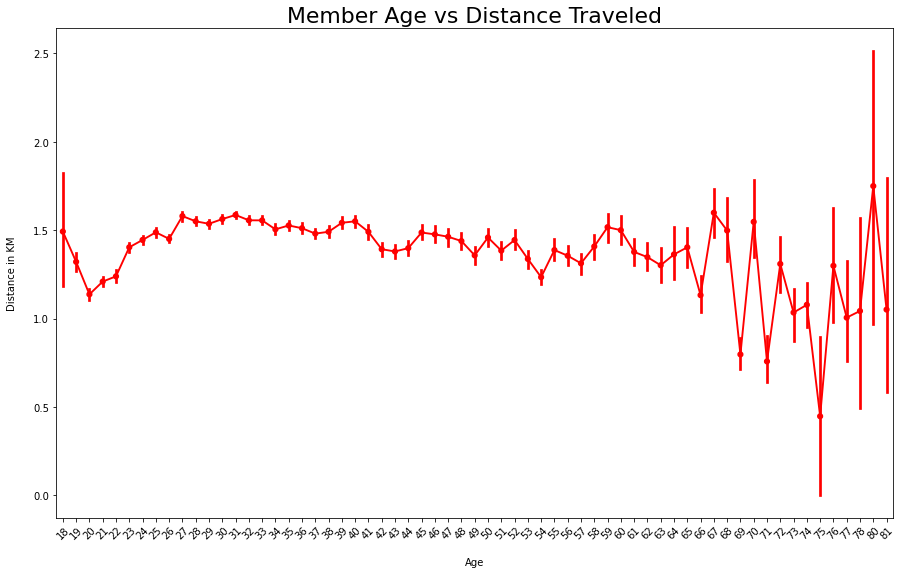

In [26]:
plt.figure(figsize=(15,9))
sb.pointplot(data = df2, x='age', y='distance', scale=.7, color='red')
plt.title('Member Age vs Distance Traveled', fontsize=22)
plt.xlabel('Age', labelpad=16)
plt.ylabel('Distance in KM', labelpad=16)
plt.xticks(rotation = 45);

- In the plot above, we can see that almost all ages are having close range of bike rides' distances .. but in the older ages we can notice more difference in the distances, having the shortest distance occuring with the age of ~75 and the longest distance occuring with age of ~80.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We could notice in the first plot in the bivariate exploration, that there is a noticeable difference between no. of rides during weekends for customers vs subscribers. While the age of the user didn't influence much the distance traveled, let's try to find out a further explanation in the multivariate exploration for the later observation.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

We can notice in the user age vs distance plot, that there is a big variance between shortest and longest distances traveled, found in old ages. this may justify that old users (probably retired) are using Lyft rides just as a sport to go for long distances, or for leisure.

## Multivariate Exploration

> We shall create plots of three or more variables to investigate your data even
further.

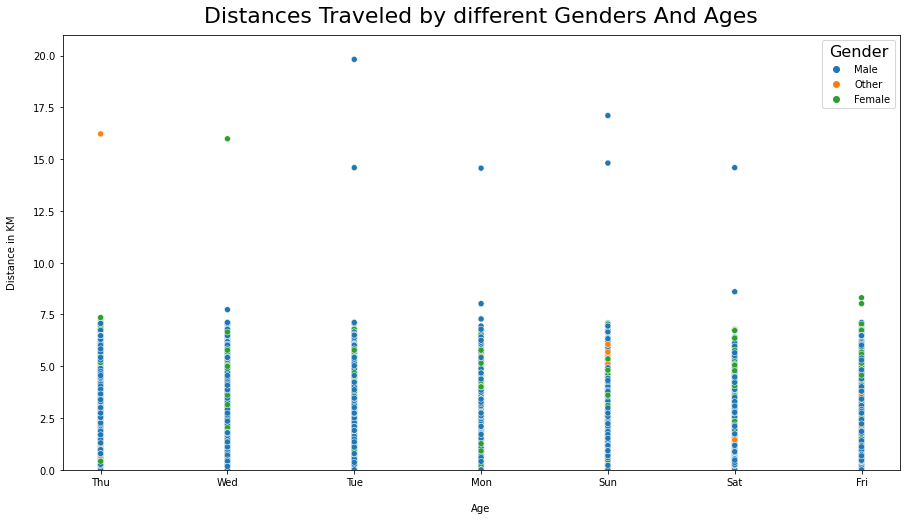

In [27]:
plt.figure(figsize=(15,8))
ax = sb.scatterplot(x='start_day_of_week', y='distance', hue='member_gender',  data=df2)
plt.title('Distances Traveled by different Genders And Ages', fontsize=22, y=1.015)
plt.xlabel('Age', labelpad=16)
plt.ylabel('Distance in KM', labelpad=16)
ax.set(ylim=(0, 21))
leg = ax.legend()
leg.set_title('Gender',prop={'size':16})
ax = plt.gca();

- In the plot above, we can notice that usually on any day, bike rides don't exceed 7.5 KM .. However, there are few outliers who make much more distances, and are mostly males

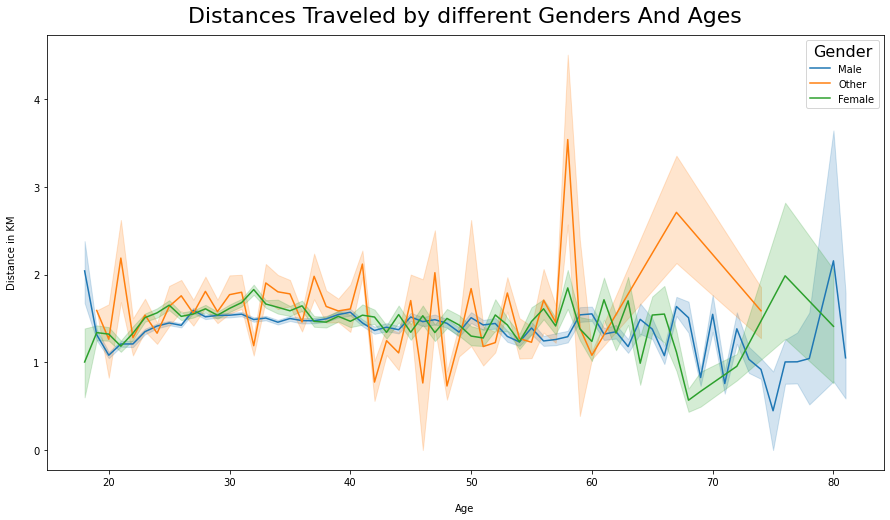

In [28]:
plt.figure(figsize=(15,8))
ax = sb.lineplot(x='age', y='distance', hue='member_gender',  data=df2)
plt.title('Distances Traveled by different Genders And Ages', fontsize=22, y=1.015)
plt.xlabel('Age', labelpad=16)
plt.ylabel('Distance in KM', labelpad=16)
leg = ax.legend()
leg.set_title('Gender',prop={'size':16})
ax = plt.gca();

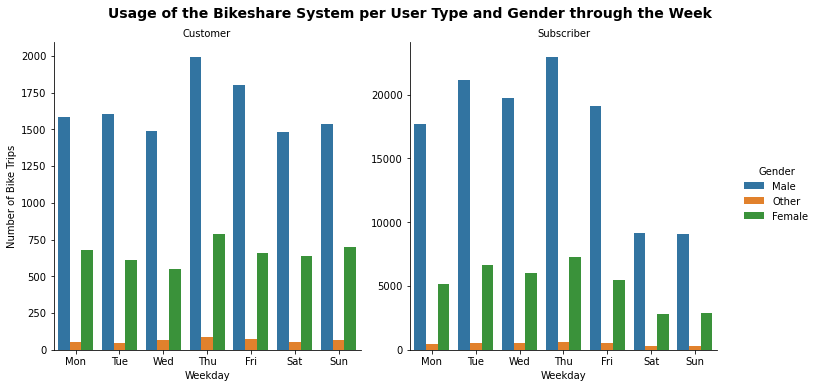

In [29]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df2, x='start_day_of_week', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Usage of the Bikeshare System per User Type and Gender through the Week', y=1.03, fontsize=14, fontweight='semibold');


- In the previous 2 plots, We can tell that there is no noticeable difference between genders in rides distances, but there is a difference in the no. of rides each day.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

After conducting bivariate and multivariate exploration, we can safely say that most of the subscribers only use the app to get to/from work, while more customers use it during weekends for outings. We can also notice that males and females are having nearly the similar distrubution in bike usage through the week, only the no. of trips is what differs. 


### Were there any interesting or surprising interactions between features?

We can see a some usage by 'other' genders to the application. 